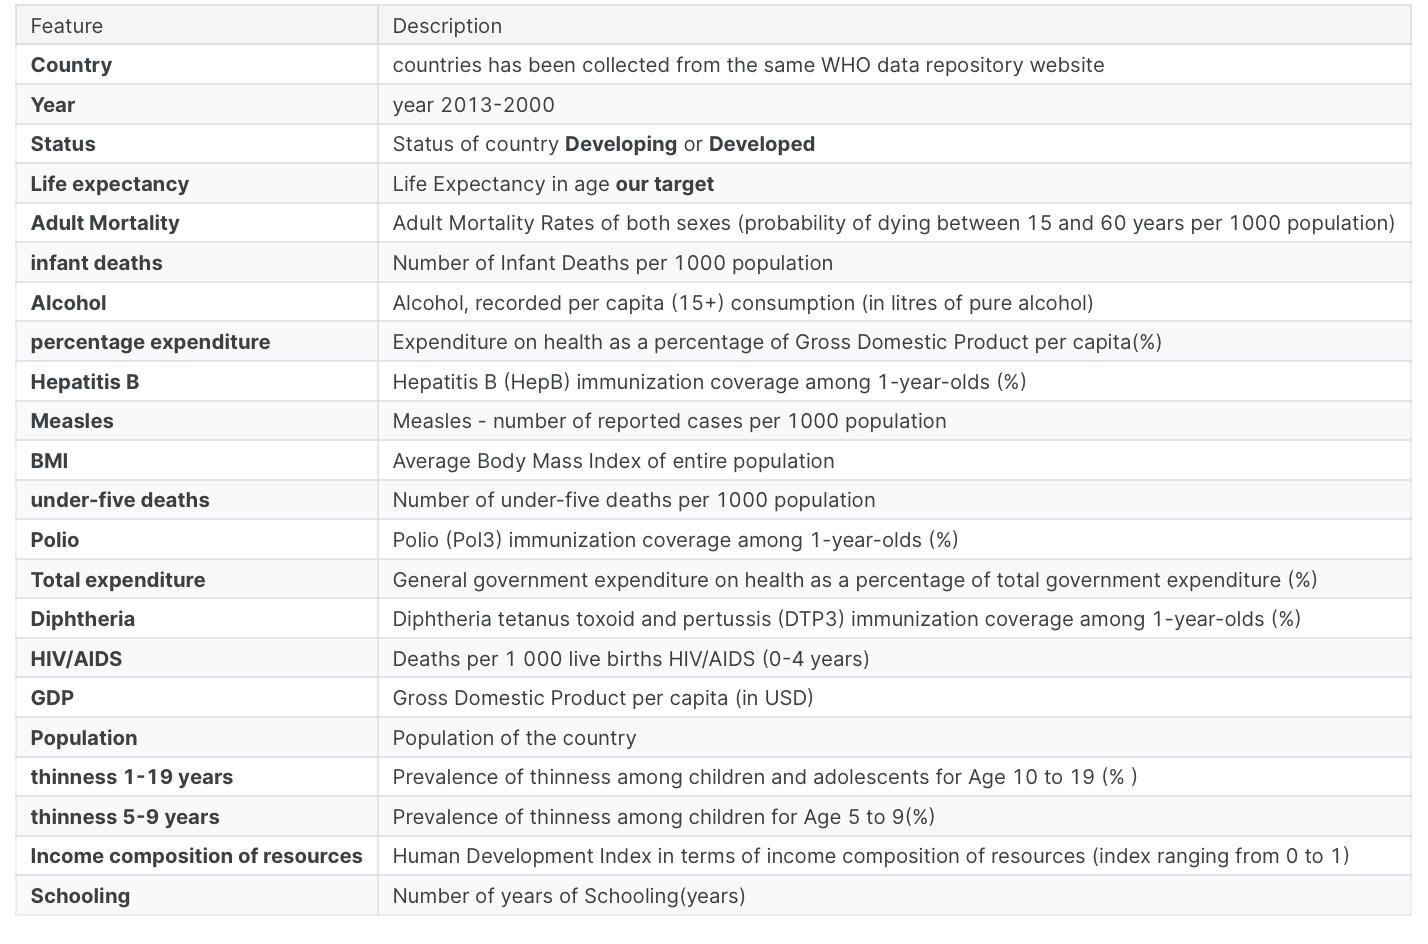

In [1]:
# import necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Data Import

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Data Study

In [3]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (2938, 22)


In [4]:
print(f'Columns in the dataset:\n\n{list(df.columns)}')

Columns in the dataset:



['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [5]:
# Removing unwanted spaces and replacing space between words with underscore
df.columns = df.columns.str.strip().str.replace(' ','_')

In [6]:
# Renaming a column name appropriately
df.rename(columns = {'thinness__1-19_years':'thinness_1-19_years'},inplace = True)

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [8]:
# Basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2938 entries, 0 to 2937

Data columns (total 22 columns):

 #   Column                           Non-Null Count  Dtype  

---  ------                           --------------  -----  

 0   Country                          2938 non-null   object 

 1   Year                             2938 non-null   int64  

 2   Status                           2938 non-null   object 

 3   Life_expectancy                  2928 non-null   float64

 4   Adult_Mortality                  2928 non-null   float64

 5   infant_deaths                    2938 non-null   int64  

 6   Alcohol                          2744 non-null   float64

 7   percentage_expenditure           2938 non-null   float64

 8   Hepatitis_B                      2385 non-null   float64

 9   Measles                          2938 non-null   int64  

 10  BMI                              2904 non-null   float64

 11  under-five_deaths                2938 non-null   int64  

 12  Pol

In [9]:
# Displaying the float values with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [10]:
df.describe().T

count        mean         std     min  \
Year                            2938.00     2007.52        4.61 2000.00   
Life_expectancy                 2928.00       69.22        9.52   36.30   
Adult_Mortality                 2928.00      164.80      124.29    1.00   
infant_deaths                   2938.00       30.30      117.93    0.00   
Alcohol                         2744.00        4.60        4.05    0.01   
percentage_expenditure          2938.00      738.25     1987.91    0.00   
Hepatitis_B                     2385.00       80.94       25.07    1.00   
Measles                         2938.00     2419.59    11467.27    0.00   
BMI                             2904.00       38.32       20.04    1.00   
under-five_deaths               2938.00       42.04      160.45    0.00   
Polio                           2919.00       82.55       23.43    3.00   
Total_expenditure               2712.00        5.94        2.50    0.37   
Diphtheria                      2919.00       82.32       23.72    2.00   
HIV/AIDS                        2938.00        1.74        5.08    0.10   
GDP                             2490.00     7483.16    14270.17    1.68   
Population                      2286.00 12753375.12 61012096.51   34.00   
thinness_1-19_years             2904.00        4.84        4.42    0.10   
thinness_5-9_years              2904.00        4.87        4.51    0.10   
Income_composition_of_resources 2771.00        0.63        0.21    0.00   
Schooling                       2775.00       11.99        3.36    0.00   

                                      25%        50%        75%           max  
Year                              2004.00    2008.00    2012.00       2015.00  
Life_expectancy                     63.10      72.10      75.70         89.00  
Adult_Mortality                     74.00     144.00     228.00        723.00  
infant_deaths                        0.00       3.00      22.00       1800.00  
Alcohol                              0.88       3.75       7.70         17.87  
percentage_expenditure               4.69      64.91     441.53      19479.91  
Hepatitis_B                         77.00      92.00      97.00         99.00  
Measles                              0.00      17.00     360.25     212183.00  
BMI                                 19.30      43.50      56.20         87.30  
under-five_deaths                    0.00       4.00      28.00       2500.00  
Polio                               78.00      93.00      97.00         99.00  
Total_expenditure                    4.26       5.75       7.49         17.60  
Diphtheria                          78.00      93.00      97.00         99.00  
HIV/AIDS                             0.10       0.10       0.80         50.60  
GDP                                463.94    1766.95    5910.81     119172.74  
Population                      195793.25 1386542.00 7420359.00 1293859294.00  
thinness_1-19_years                  1.60       3.30       7.20         27.70  
thinness_5-9_years                   1.50       3.30       7.20         28.60  
Income_composition_of_resources      0.49       0.68       0.78          0.95  
Schooling                           10.10      12.30      14.30         20.70

In [11]:
df.describe(include = 'O')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

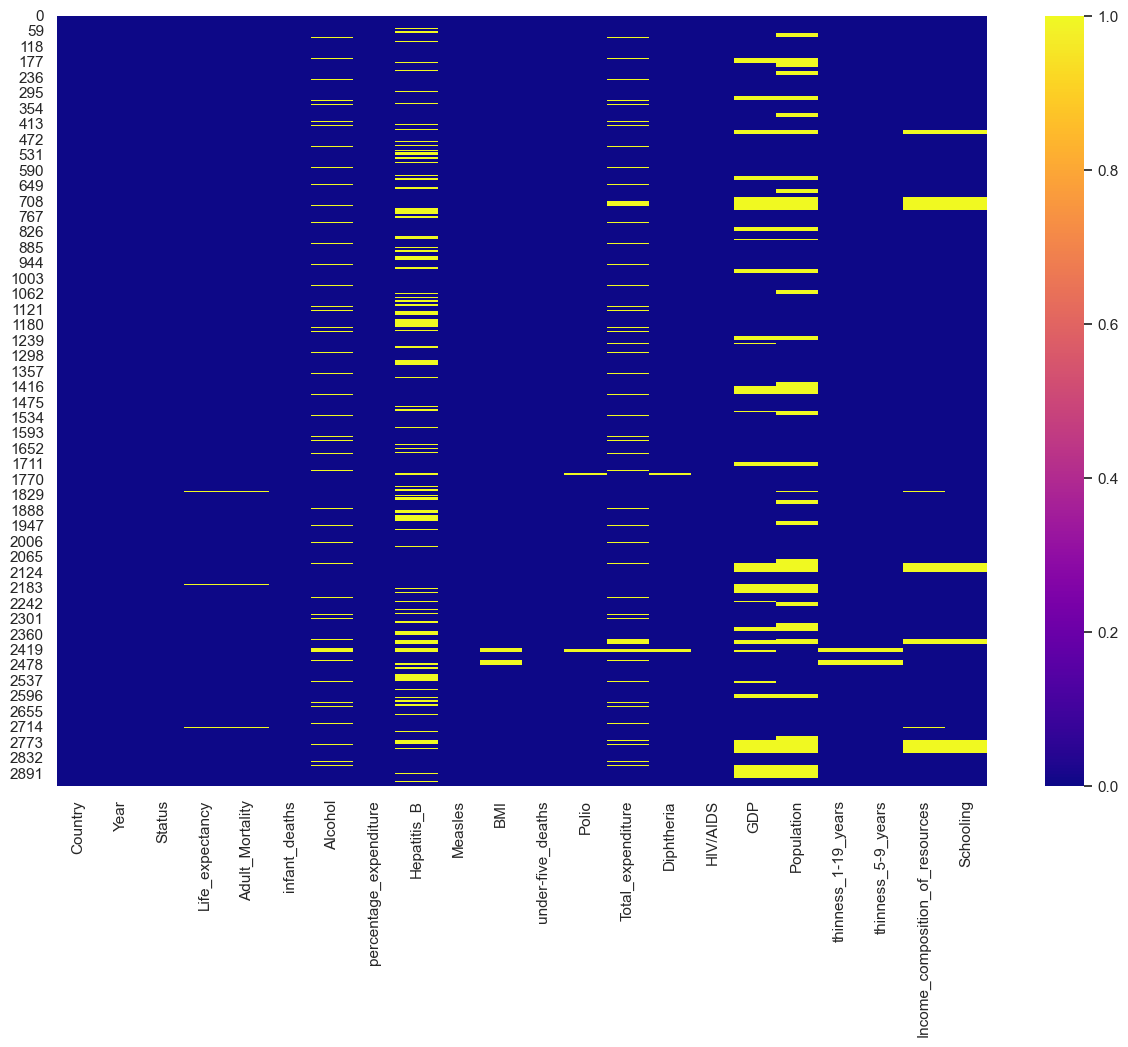

In [12]:
#visual representation of missing values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cmap = 'plasma')
plt.show()

In [13]:
# Display of number of missing values in each feature
print(f'NULL values in the dataset:\n\n{df.isnull().sum()}')

NULL values in the dataset:



Country                              0

Year                                 0

Status                               0

Life_expectancy                     10

Adult_Mortality                     10

infant_deaths                        0

Alcohol                            194

percentage_expenditure               0

Hepatitis_B                        553

Measles                              0

BMI                                 34

under-five_deaths                    0

Polio                               19

Total_expenditure                  226

Diphtheria                          19

HIV/AIDS                             0

GDP                                448

Population                         652

thinness_1-19_years                 34

thinness_5-9_years                  34

Income_composition_of_resources    167

Schooling                          163

dtype: int64


In [14]:
# Duplicates in the dataset
print(f'Duplicates in the dataset: {df.duplicated().sum()}')

Duplicates in the dataset: 0


## Exploratory Data Analysis(EDA)

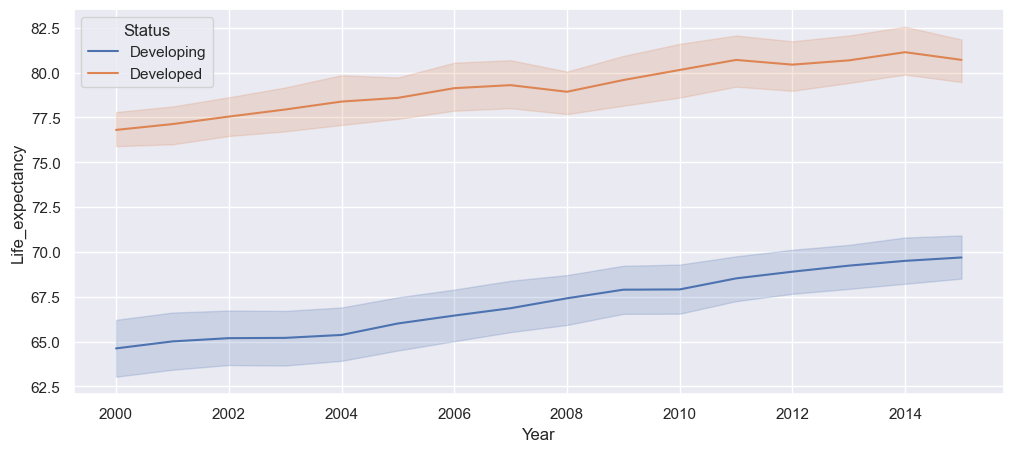

In [15]:
# Life_expectancy over the years on the basis of country status

plt.figure(figsize = (12,5))
sns.lineplot(df,x = 'Year', y = 'Life_expectancy',hue = 'Status')
plt.show()

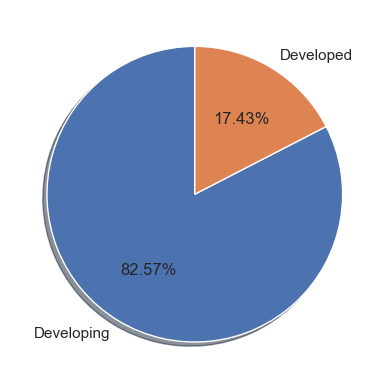

In [16]:
# Percentage of data present according to country status

plt.pie(df['Status'].value_counts(), labels = df['Status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, startangle=90)
plt.show()

In [17]:
top_data = pd.DataFrame(df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = True).head(10))

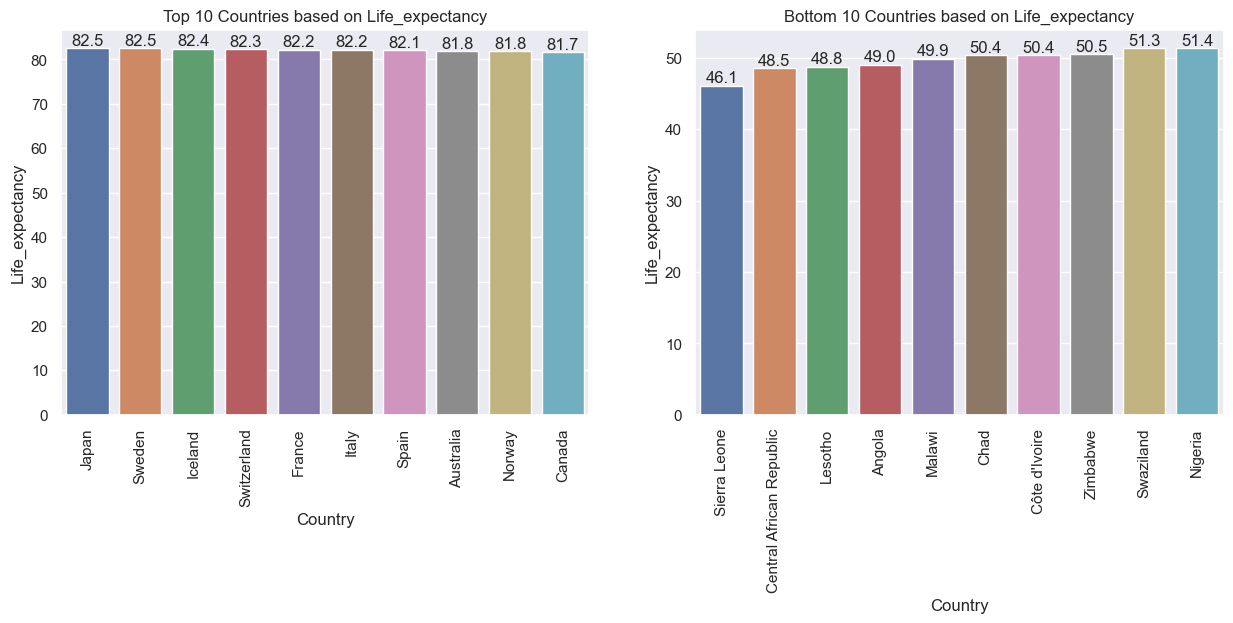

In [18]:
# Display of top and bottom 10 countries on Life_expectancy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data,x = top_data.index, y = 'Life_expectancy')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life_expectancy')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

In [19]:
#Separating the numerical features from the dataset

df_numerical = df.select_dtypes(include=np.number)
df_numerical.drop(['Year'], axis = 1, inplace = True)

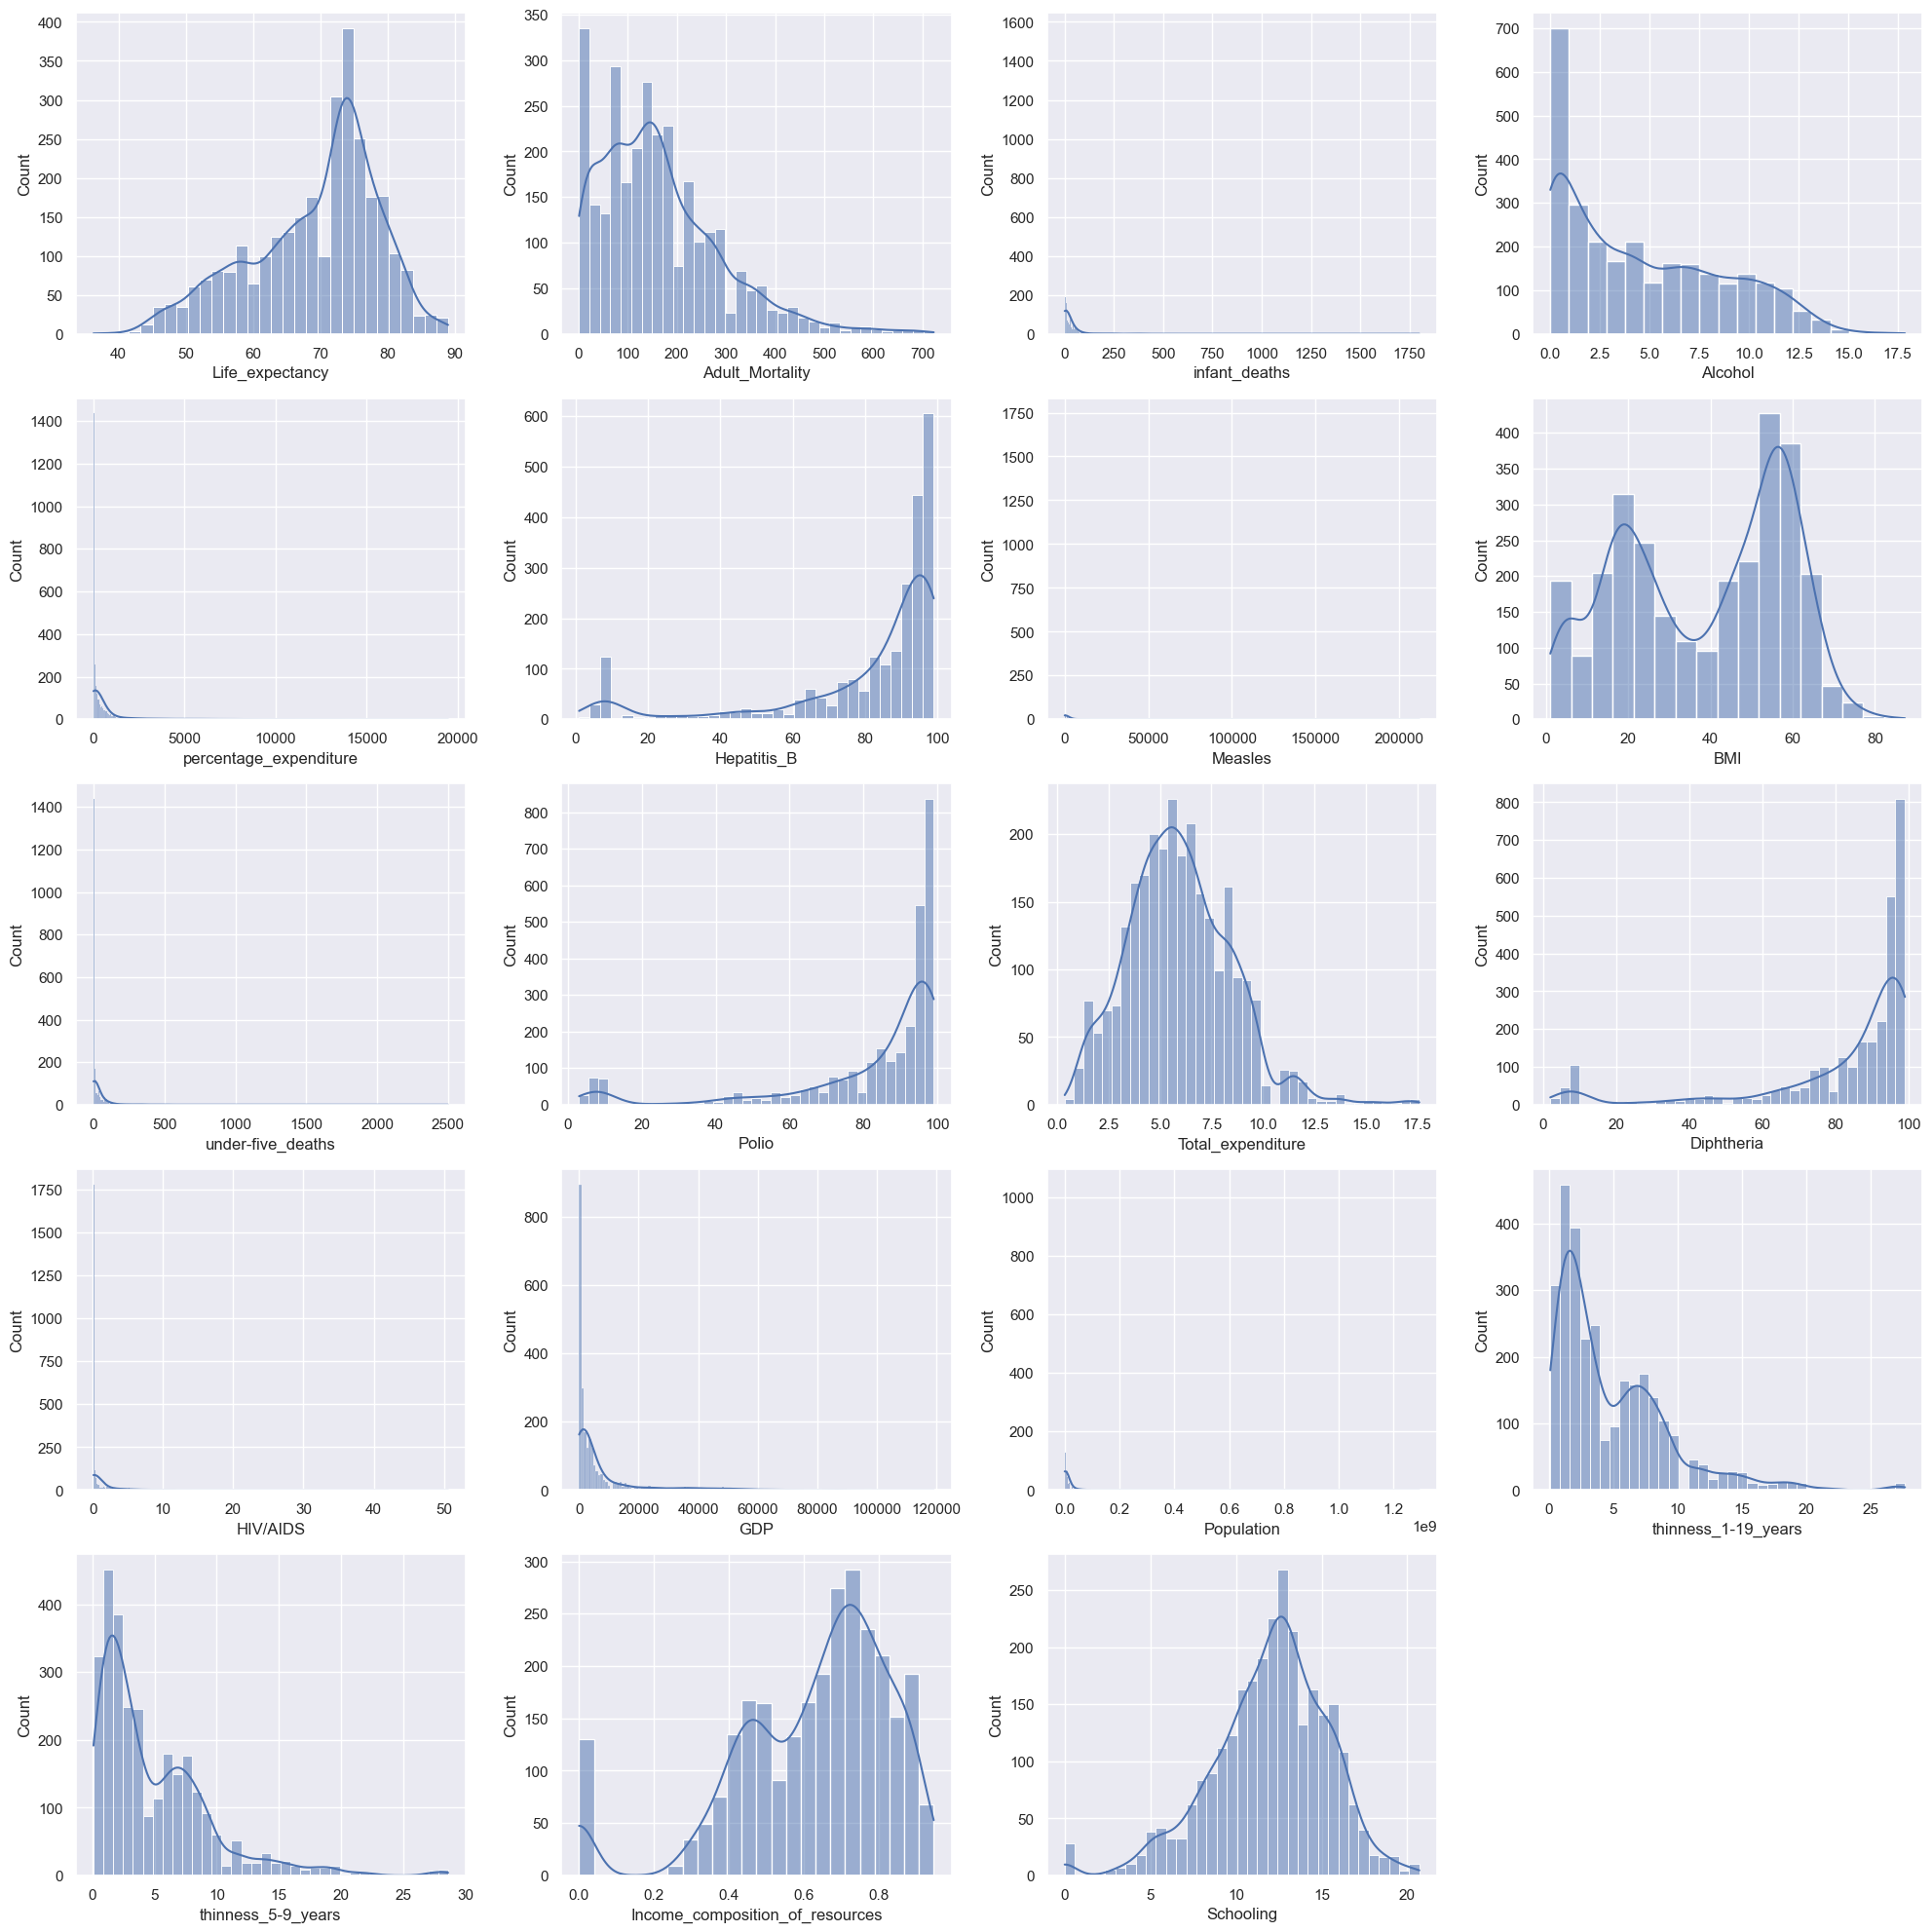

In [20]:
# Checking the distribution of each feature using histogram

plt.figure(figsize=(20,20))
for col in range(len(df_numerical.columns)):
    plt.subplot(5,4,col+1)
    sns.histplot(df_numerical,x = df_numerical.columns[col], kde=True)
plt.tight_layout()
plt.show()

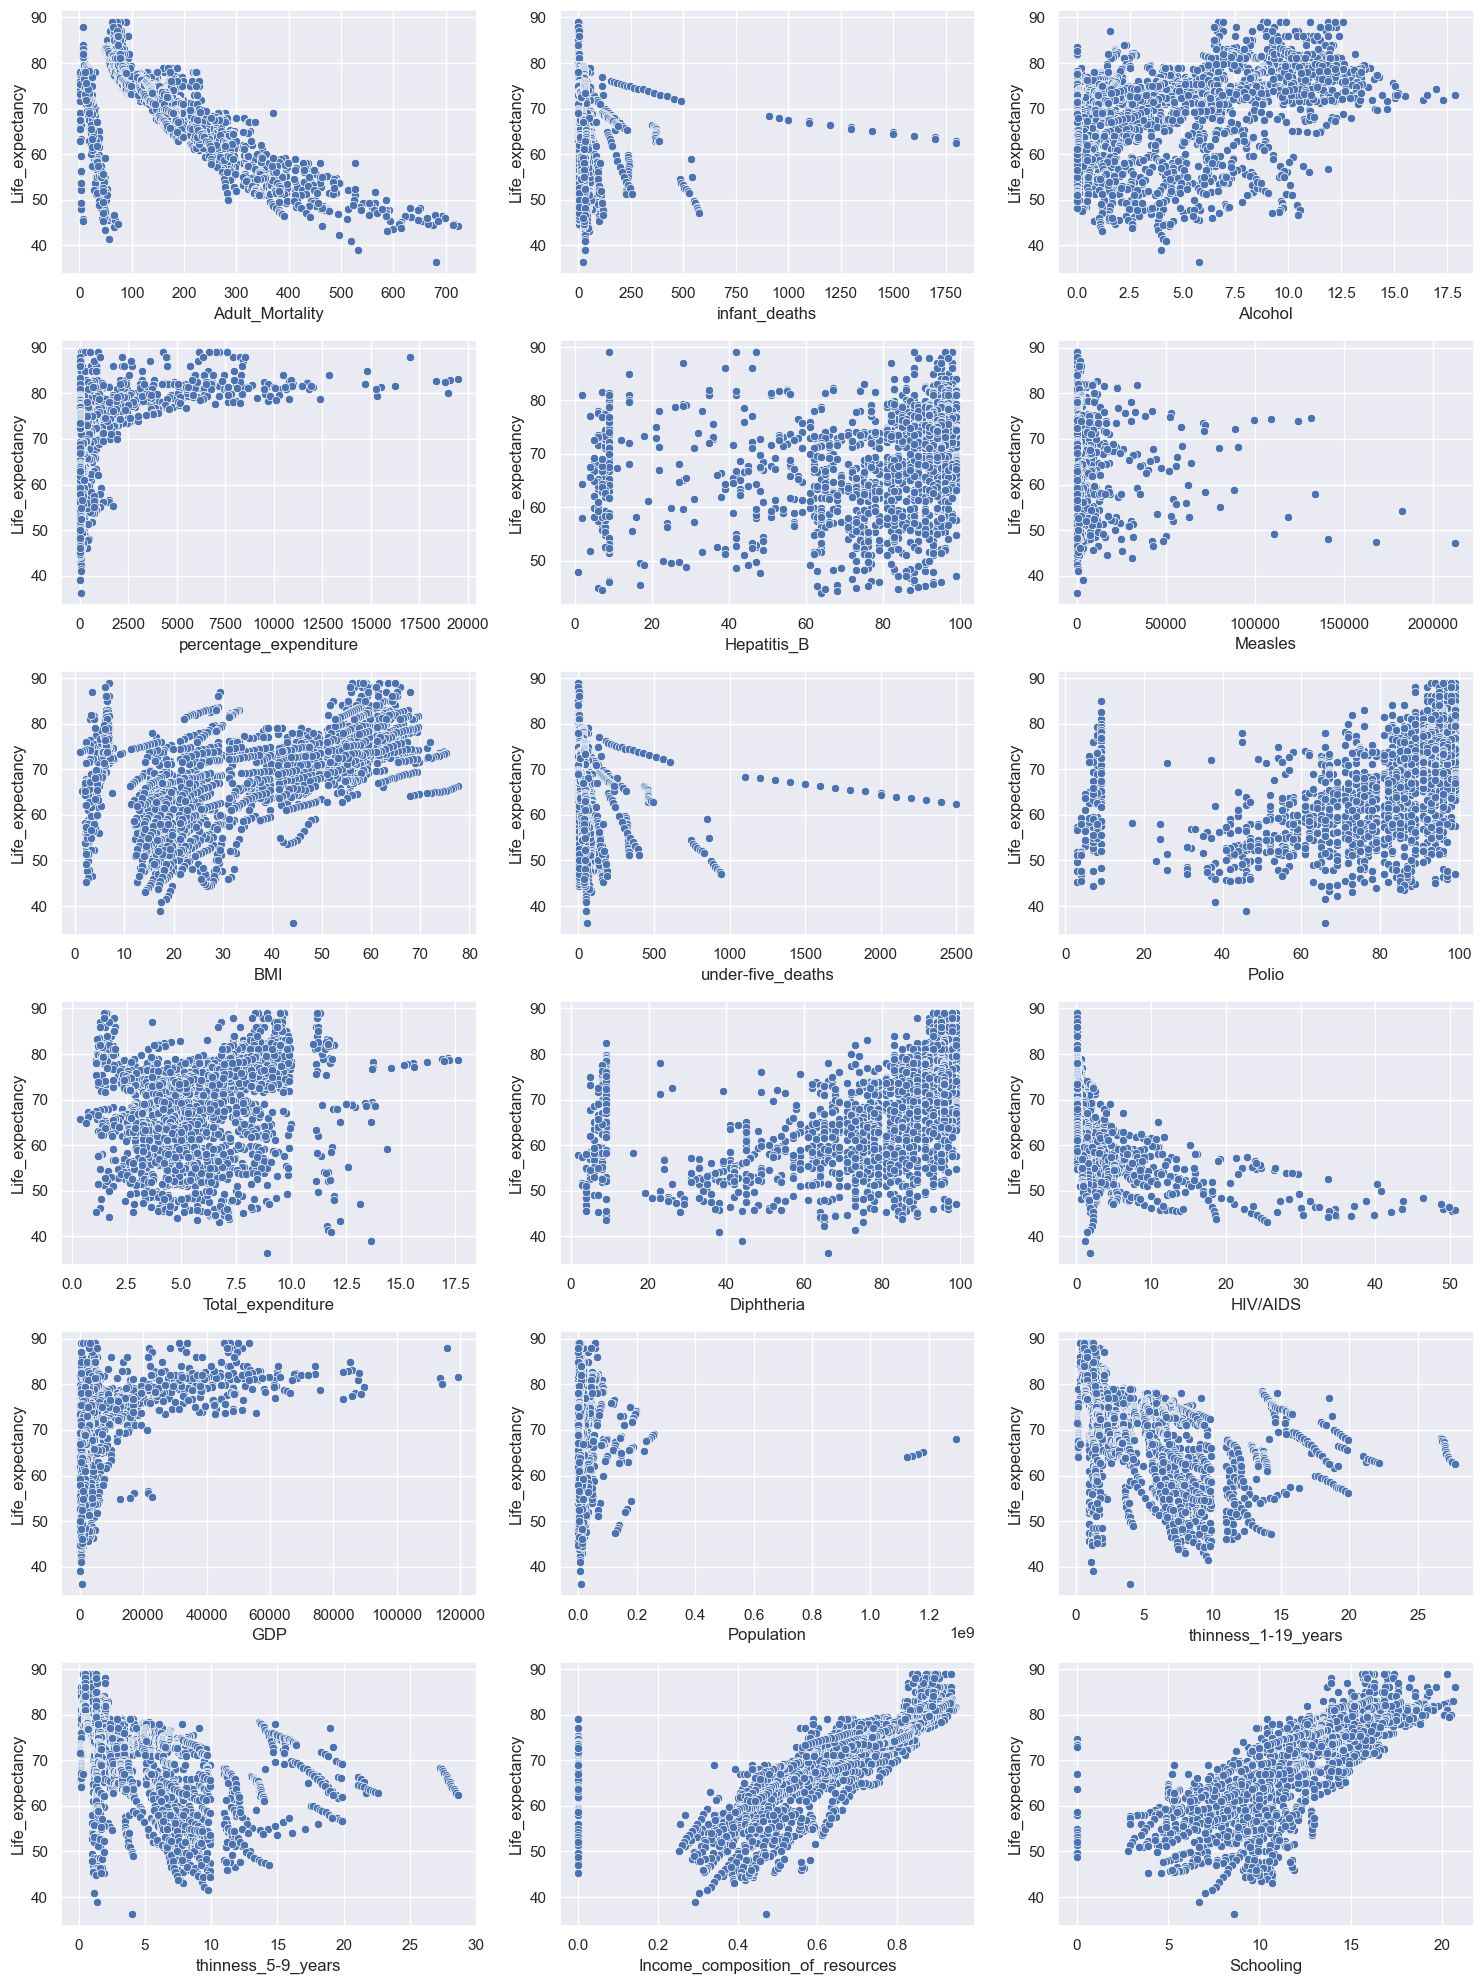

In [21]:
#Relationship between Life_expectancy and other numerical varibales

plt.figure(figsize=(15,20))
for col in range(1,len(df_numerical.columns)):
    plt.subplot(6,3,col)
    sns.scatterplot(df_numerical,x = df_numerical.columns[col], y = 'Life_expectancy')
plt.tight_layout()
plt.show()

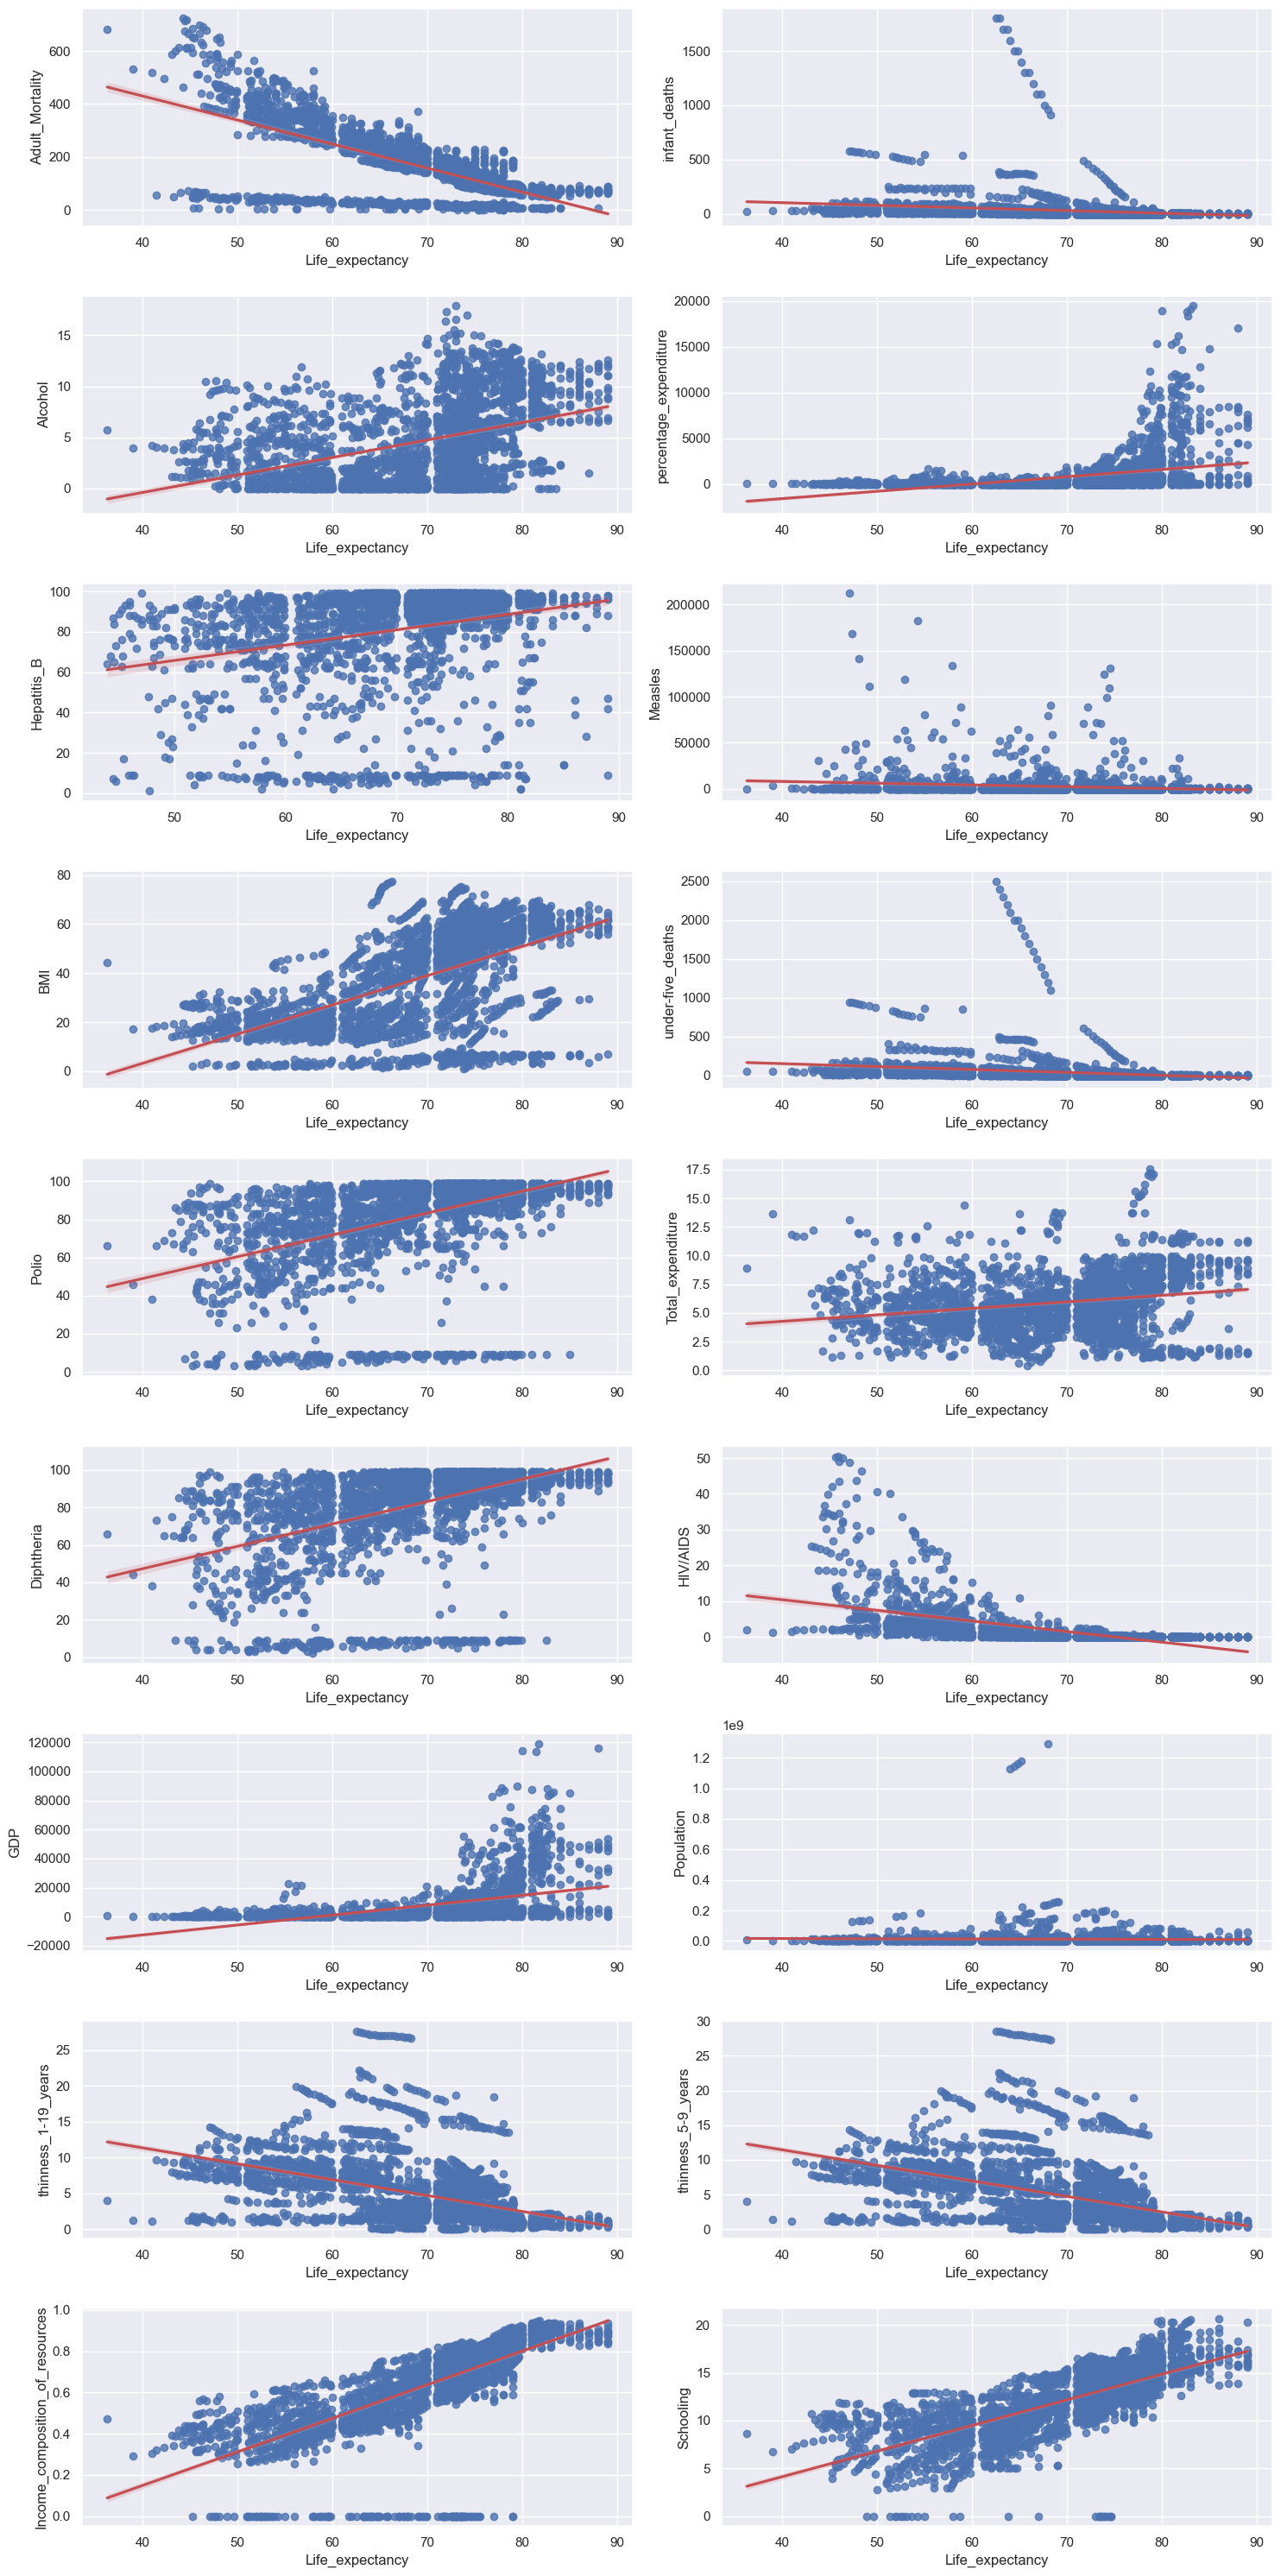

In [22]:
# Visualising the linera relationship between Life_expectancy and other features of the dataset

plt.figure(figsize=(15,30))
for col in range(1,len(df_numerical.columns)):
    plt.subplot(9,2,col)
    sns.regplot(df_numerical,y = df_numerical.columns[col], x = 'Life_expectancy', line_kws = {'color' : 'r'})
plt.tight_layout()
plt.show()

## Data Preparation

In [23]:
# Splitting the dependent and independent variables of the dataset 

df_x = df.drop('Life_expectancy', axis = 1)
df_y = df.Life_expectancy

In [24]:
columns = list(df_x.columns)
columns.remove('Country')
columns.remove('Status')

In [25]:
# Calculations to find the outliers

Q1 = df_x.quantile(0.25) #Quartile-1 25% value
Q3 = df_x.quantile(0.75) #Quartile-3 75% value
IQR = Q3 - Q1            #Inter_Quartile Range
UL = Q3 + 1.5*IQR        #upper limit value
LL = Q1 - 1.5*IQR        #lower limit value

quartiles = pd.DataFrame({'Q1':Q1.values, 'Q3':Q3.values, 'IQR':IQR.values, 'UpperLimit': UL.values,
                         'LowerLimit':LL.values},index = columns)
quartiles.head(20)

Q1         Q3        IQR  UpperLimit  \
Year                              2004.00    2012.00       8.00     2024.00   
Adult_Mortality                     74.00     228.00     154.00      459.00   
infant_deaths                        0.00      22.00      22.00       55.00   
Alcohol                              0.88       7.70       6.83       17.94   
percentage_expenditure               4.69     441.53     436.85     1096.81   
Hepatitis_B                         77.00      97.00      20.00      127.00   
Measles                              0.00     360.25     360.25      900.62   
BMI                                 19.30      56.20      36.90      111.55   
under-five_deaths                    0.00      28.00      28.00       70.00   
Polio                               78.00      97.00      19.00      125.50   
Total_expenditure                    4.26       7.49       3.23       12.34   
Diphtheria                          78.00      97.00      19.00      125.50   
HIV/AIDS                             0.10       0.80       0.70        1.85   
GDP                                463.94    5910.81    5446.87    14081.11   
Population                      195793.25 7420359.00 7224565.75 18257207.62   
thinness_1-19_years                  1.60       7.20       5.60       15.60   
thinness_5-9_years                   1.50       7.20       5.70       15.75   
Income_composition_of_resources      0.49       0.78       0.29        1.21   
Schooling                           10.10      14.30       4.20       20.60   

                                  LowerLimit  
Year                                 1992.00  
Adult_Mortality                      -157.00  
infant_deaths                         -33.00  
Alcohol                                -9.36  
percentage_expenditure               -650.59  
Hepatitis_B                            47.00  
Measles                              -540.38  
BMI                                   -36.05  
under-five_deaths                     -42.00  
Polio                                  49.50  
Total_expenditure                      -0.59  
Diphtheria                             49.50  
HIV/AIDS                               -0.95  
GDP                                 -7706.37  
Population                      -10641055.38  
thinness_1-19_years                    -6.80  
thinness_5-9_years                     -7.05  
Income_composition_of_resources         0.06  
Schooling                               3.80

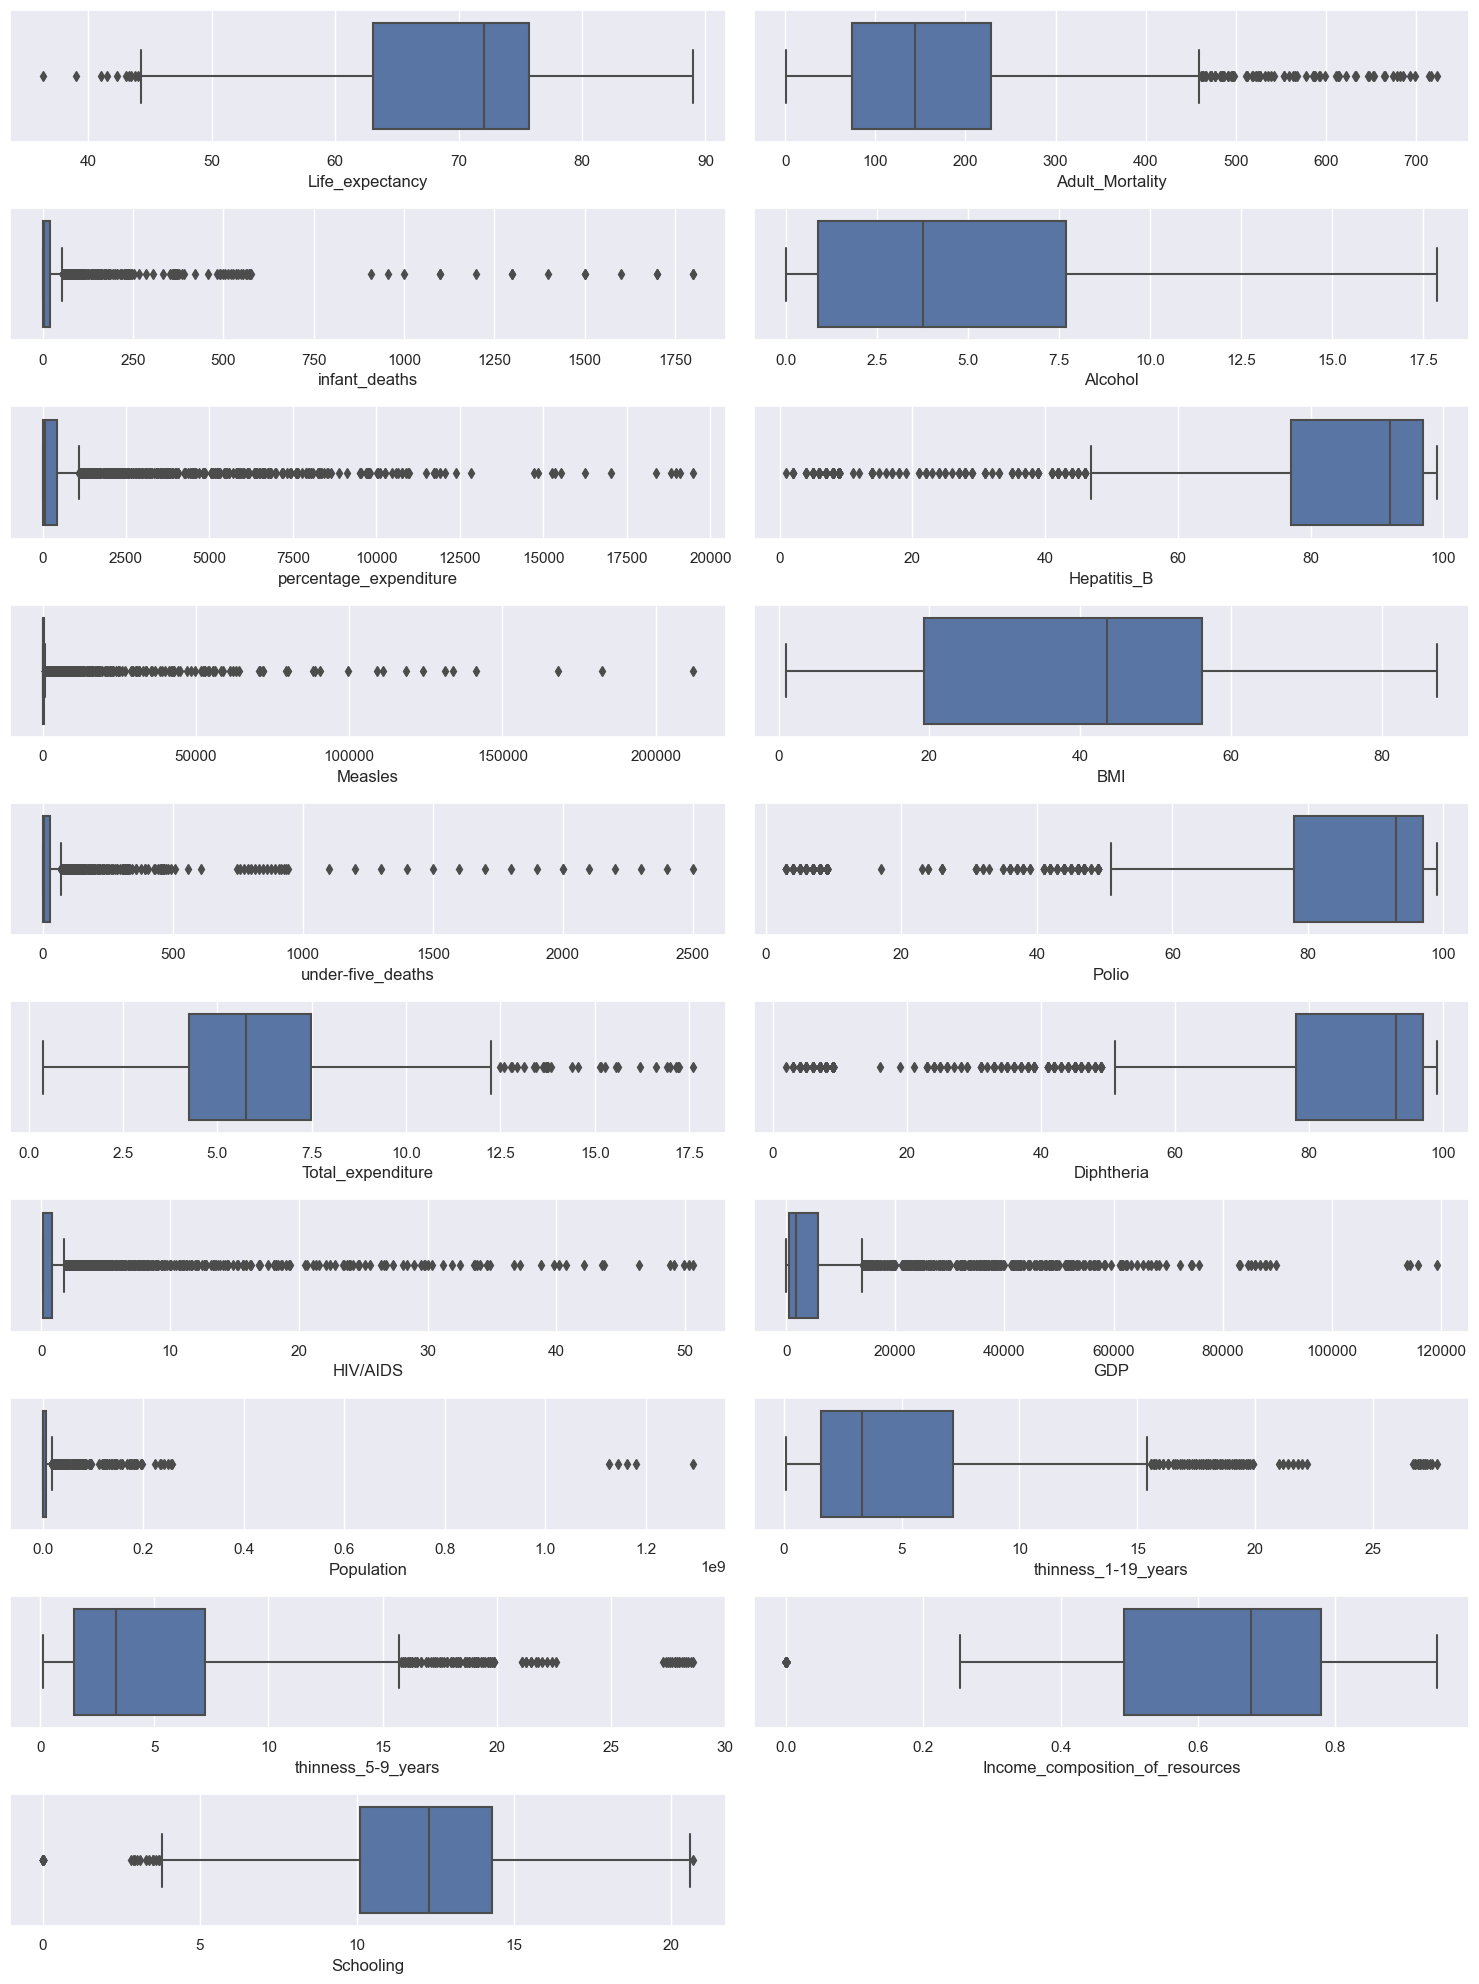

In [26]:
# Visual representation of outliers in the features

plt.figure(figsize=(15,20))
for col in range(len(df_numerical.columns)):
    plt.subplot(10,2,col+1)
    sns.boxplot(df_numerical,x = df_numerical.columns[col])
plt.tight_layout()
plt.show()

In [27]:
# Number of outliers in each column of the dataset

print(f'Number of outliers in each column:\n\n{((df_x>UL) | (df_x<LL)).sum()}')

Number of outliers in each column:



Adult_Mortality                     82

Alcohol                              0

BMI                                  0

Country                              0

Diphtheria                         298

GDP                                365

HIV/AIDS                           542

Hepatitis_B                        254

Income_composition_of_resources    130

Measles                            542

Polio                              279

Population                         294

Schooling                           44

Status                               0

Total_expenditure                   32

Year                                 0

infant_deaths                      315

percentage_expenditure             389

thinness_1-19_years                 89

thinness_5-9_years                  96

under-five_deaths                  394

dtype: int64


In [28]:
# Number of NULL values in each independent variable of the dataset

print(f'Number of NULL values in each column:\n\n{df_x.isnull().sum()}')

Number of NULL values in each column:



Country                              0

Year                                 0

Status                               0

Adult_Mortality                     10

infant_deaths                        0

Alcohol                            194

percentage_expenditure               0

Hepatitis_B                        553

Measles                              0

BMI                                 34

under-five_deaths                    0

Polio                               19

Total_expenditure                  226

Diphtheria                          19

HIV/AIDS                             0

GDP                                448

Population                         652

thinness_1-19_years                 34

thinness_5-9_years                  34

Income_composition_of_resources    167

Schooling                          163

dtype: int64


In [29]:
# Number of NULL values in the target variable of the dataset

print(f'Number of NULL values in the taget variable: {df_y.isnull().sum()}')

Number of NULL values in the taget variable: 10


In [30]:
# Percentage of NULL values in each independent variable of the dataset

print(f'Percentage of NULL values in each column:\n\n{df_x.isnull().sum()/len(df_x)*100}')

Percentage of NULL values in each column:



Country                            0.00

Year                               0.00

Status                             0.00

Adult_Mortality                    0.34

infant_deaths                      0.00

Alcohol                            6.60

percentage_expenditure             0.00

Hepatitis_B                       18.82

Measles                            0.00

BMI                                1.16

under-five_deaths                  0.00

Polio                              0.65

Total_expenditure                  7.69

Diphtheria                         0.65

HIV/AIDS                           0.00

GDP                               15.25

Population                        22.19

thinness_1-19_years                1.16

thinness_5-9_years                 1.16

Income_composition_of_resources    5.68

Schooling                          5.55

dtype: float64


## Standardisation

In [31]:
# Splitting the numerical and categorical columns in the independent variables.

df_x_numerical = df_x.select_dtypes(include=np.number)
df_x_categorical = df_x.select_dtypes(exclude=np.number)

In [32]:
# Standardisation of the data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_x_numerical = pd.DataFrame(scaler.fit_transform(df_x_numerical), columns = df_x_numerical.columns)

In [33]:
print(f'Number of NULL values in each column after scaling:\n\n{scaled_df_x_numerical.isnull().sum()}')

Number of NULL values in each column after scaling:



Year                                 0

Adult_Mortality                     10

infant_deaths                        0

Alcohol                            194

percentage_expenditure               0

Hepatitis_B                        553

Measles                              0

BMI                                 34

under-five_deaths                    0

Polio                               19

Total_expenditure                  226

Diphtheria                          19

HIV/AIDS                             0

GDP                                448

Population                         652

thinness_1-19_years                 34

thinness_5-9_years                  34

Income_composition_of_resources    167

Schooling                          163

dtype: int64


## Missing Values Imputation

In [34]:
# Imputation of missing values using KNNImputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 11)
df_x_numerical_imputed = pd.DataFrame(imputer.fit_transform(scaled_df_x_numerical), columns = scaled_df_x_numerical.columns)

In [35]:
print(f'Number of NULL values in each column after imputation:\n\n{df_x_numerical_imputed.isnull().sum()}')

Number of NULL values in each column after imputation:



Year                               0

Adult_Mortality                    0

infant_deaths                      0

Alcohol                            0

percentage_expenditure             0

Hepatitis_B                        0

Measles                            0

BMI                                0

under-five_deaths                  0

Polio                              0

Total_expenditure                  0

Diphtheria                         0

HIV/AIDS                           0

GDP                                0

Population                         0

thinness_1-19_years                0

thinness_5-9_years                 0

Income_composition_of_resources    0

Schooling                          0

dtype: int64


In [36]:
# Concatenating the numerical and categorical columns

df_imputed = pd.concat([df_x_categorical,df_x_numerical_imputed], axis = 1)

In [37]:
# Concatenating the independent and target variables

df_model = pd.concat([df_imputed,df_y],axis = 1)

In [38]:
df_model.head()

Country      Status  Year  Adult_Mortality  infant_deaths  Alcohol  \
0  Afghanistan  Developing  1.62             0.79           0.27    -1.13   
1  Afghanistan  Developing  1.40             0.85           0.29    -1.13   
2  Afghanistan  Developing  1.19             0.83           0.30    -1.13   
3  Afghanistan  Developing  0.97             0.86           0.33    -1.13   
4  Afghanistan  Developing  0.75             0.89           0.35    -1.13   

   percentage_expenditure  Hepatitis_B  Measles   BMI  ...  Total_expenditure  \
0                   -0.34        -0.64    -0.11 -0.96  ...               0.89   
1                   -0.33        -0.76    -0.17 -0.98  ...               0.90   
2                   -0.33        -0.68    -0.17 -1.01  ...               0.88   
3                   -0.33        -0.56     0.03 -1.03  ...               1.03   
4                   -0.37        -0.52     0.05 -1.05  ...               0.77   

   Diphtheria  HIV/AIDS   GDP  Population  thinness_1-19_years  \
0       -0.73     -0.32 -0.48        0.34                 2.80   
1       -0.86     -0.32 -0.48       -0.20                 2.86   
2       -0.77     -0.32 -0.48        0.31                 2.91   
3       -0.65     -0.32 -0.48       -0.15                 2.96   
4       -0.60     -0.32 -0.52       -0.16                 3.02   

   thinness_5-9_years  Income_composition_of_resources  Schooling  \
0                2.76                            -0.70      -0.56   
1                2.80                            -0.72      -0.59   
2                2.85                            -0.75      -0.62   
3                2.91                            -0.78      -0.65   
4                2.96                            -0.82      -0.74   

   Life_expectancy  
0            65.00  
1            59.90  
2            59.90  
3            59.50  
4            59.20  

[5 rows x 22 columns]

In [39]:
# Number of NULL values after concatenating

print(f'Number of NULL values after concatenating:\n\n{df_model.isnull().sum()}')

Number of NULL values after concatenating:



Country                             0

Status                              0

Year                                0

Adult_Mortality                     0

infant_deaths                       0

Alcohol                             0

percentage_expenditure              0

Hepatitis_B                         0

Measles                             0

BMI                                 0

under-five_deaths                   0

Polio                               0

Total_expenditure                   0

Diphtheria                          0

HIV/AIDS                            0

GDP                                 0

Population                          0

thinness_1-19_years                 0

thinness_5-9_years                  0

Income_composition_of_resources     0

Schooling                           0

Life_expectancy                    10

dtype: int64


### We can see there are missing values in the target variable. Imputation of values in target variable not advised. Hence dropping the null values

In [40]:
# Dropping the null values from the final dataset 

df_final = df_model.dropna()

In [41]:
# There are no NULL values in our dataset now

print(f'NULL values in final dataset:\n\n{df_final.isnull().sum()}')

NULL values in final dataset:



Country                            0

Status                             0

Year                               0

Adult_Mortality                    0

infant_deaths                      0

Alcohol                            0

percentage_expenditure             0

Hepatitis_B                        0

Measles                            0

BMI                                0

under-five_deaths                  0

Polio                              0

Total_expenditure                  0

Diphtheria                         0

HIV/AIDS                           0

GDP                                0

Population                         0

thinness_1-19_years                0

thinness_5-9_years                 0

Income_composition_of_resources    0

Schooling                          0

Life_expectancy                    0

dtype: int64


In [42]:
# Dropping country columns from the dataset

df_final.drop('Country', axis = 1, inplace = True)

In [43]:
# Encoding the values in Status columns 

df_final['Status'] = df_final['Status'].apply(lambda x: 1 if  x=='Developed' else 0)

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 2928 entries, 0 to 2937

Data columns (total 21 columns):

 #   Column                           Non-Null Count  Dtype  

---  ------                           --------------  -----  

 0   Status                           2928 non-null   int64  

 1   Year                             2928 non-null   float64

 2   Adult_Mortality                  2928 non-null   float64

 3   infant_deaths                    2928 non-null   float64

 4   Alcohol                          2928 non-null   float64

 5   percentage_expenditure           2928 non-null   float64

 6   Hepatitis_B                      2928 non-null   float64

 7   Measles                          2928 non-null   float64

 8   BMI                              2928 non-null   float64

 9   under-five_deaths                2928 non-null   float64

 10  Polio                            2928 non-null   float64

 11  Total_expenditure                2928 non-null   float64

 12  Dip

In [45]:
### All the values in the dataset are numerical now

In [46]:
#Resetting the index

df_final.reset_index(drop=True,inplace=True)

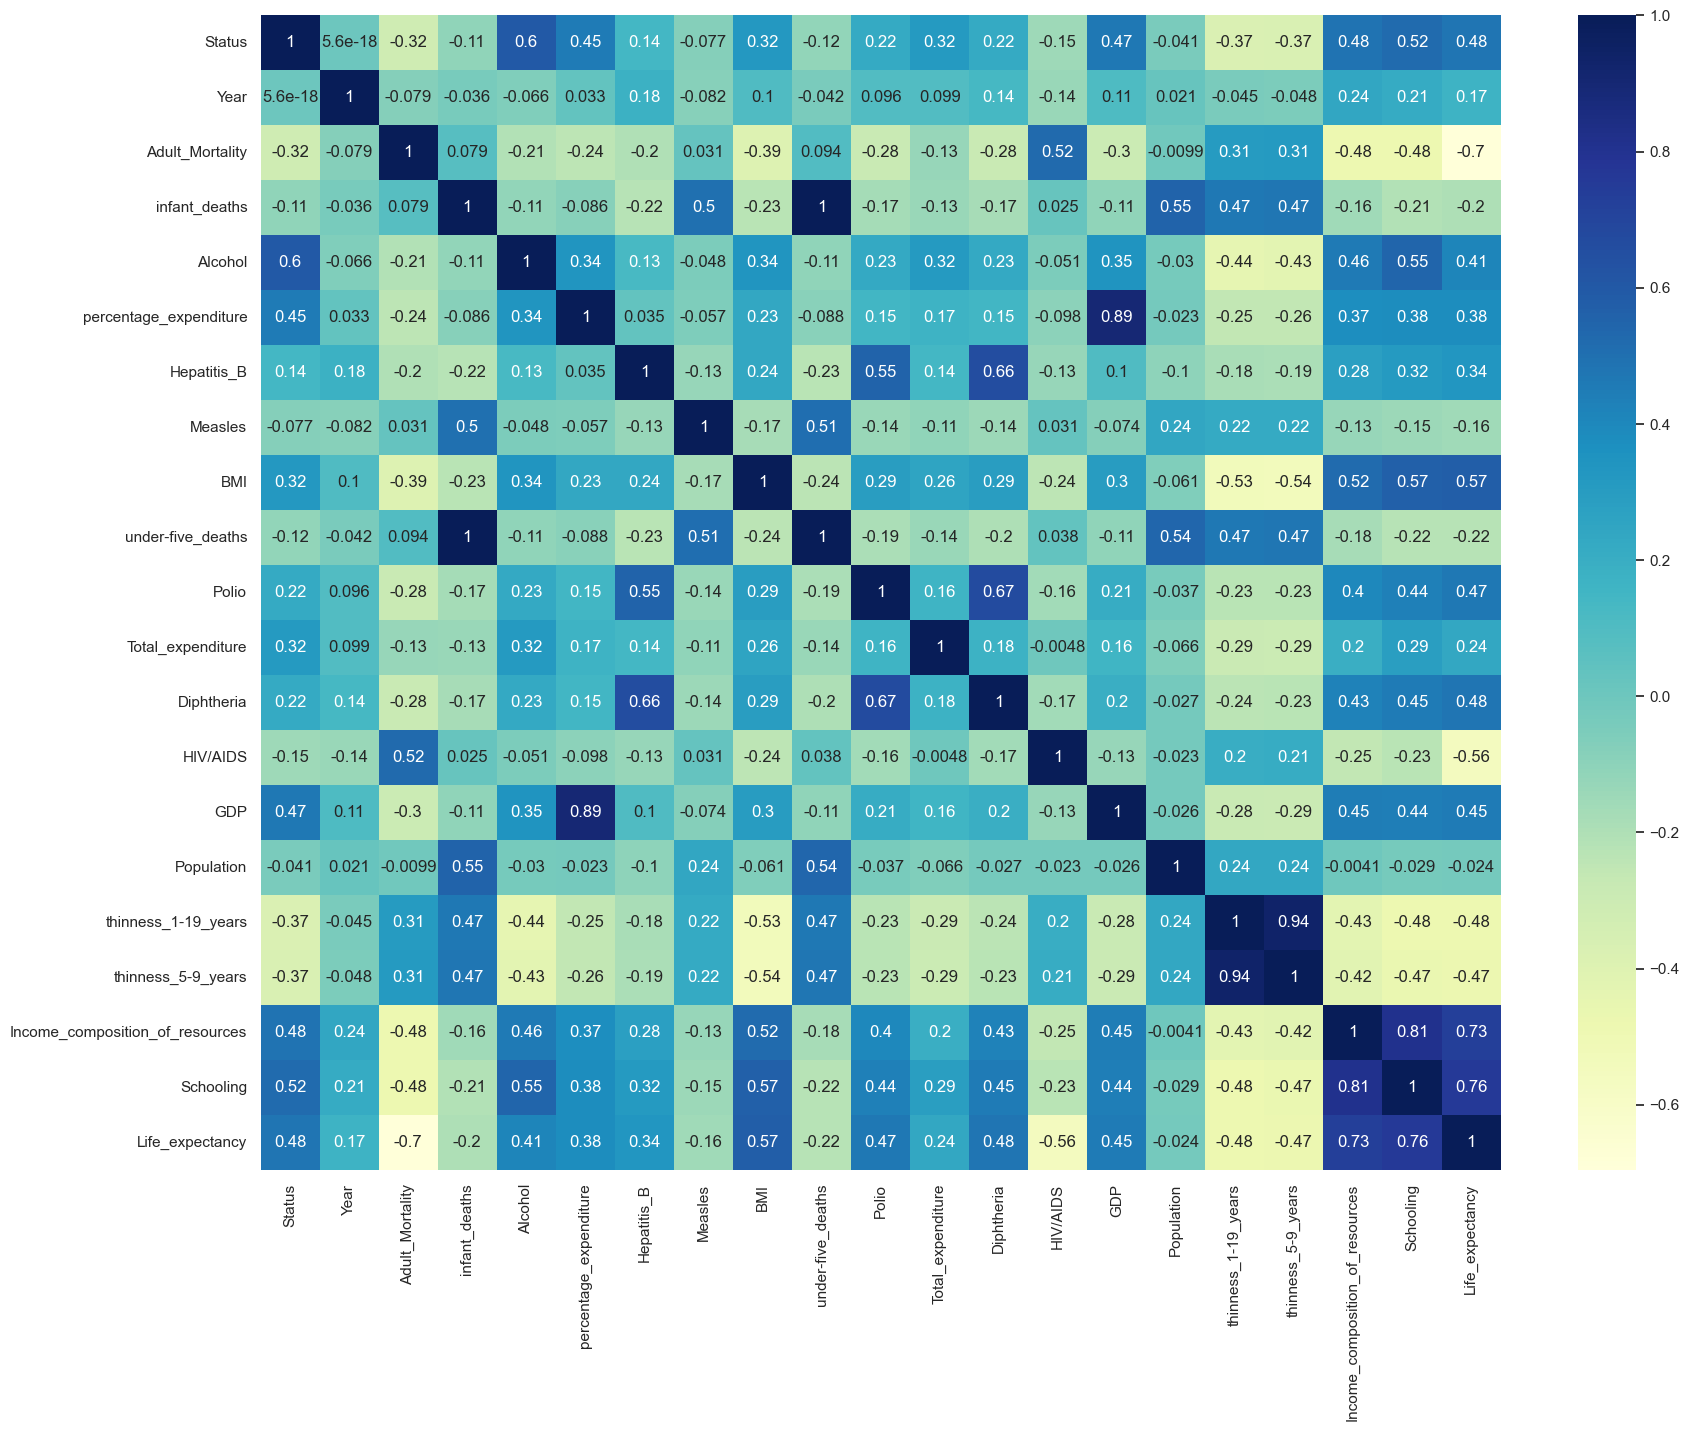

In [47]:
# Checking for correlation between the features

plt.figure(figsize = (20,15))
sns.heatmap(df_final.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

In [48]:
# Highly correlated colums are

# infant_deaths      vs  under-five_deaths
# GDP                vs  percentage_expenditure
# thinness_5-9_years vs  thinness_1-19_years
# Schooling          vs  Income_composition_of_resources

In [49]:
#Dropping columns that are highly correlated

df_final.drop(['under-five_deaths','percentage_expenditure', 'thinness_1-19_years', 
               'Income_composition_of_resources'],axis =1, inplace = True)

In [50]:
print(f'Shape of final dataset: {df_final.shape}')

Shape of final dataset: (2928, 17)


In [51]:
# Splitting the features and target variable

x = df_final.drop('Life_expectancy', axis = 1)
y = df_final['Life_expectancy']

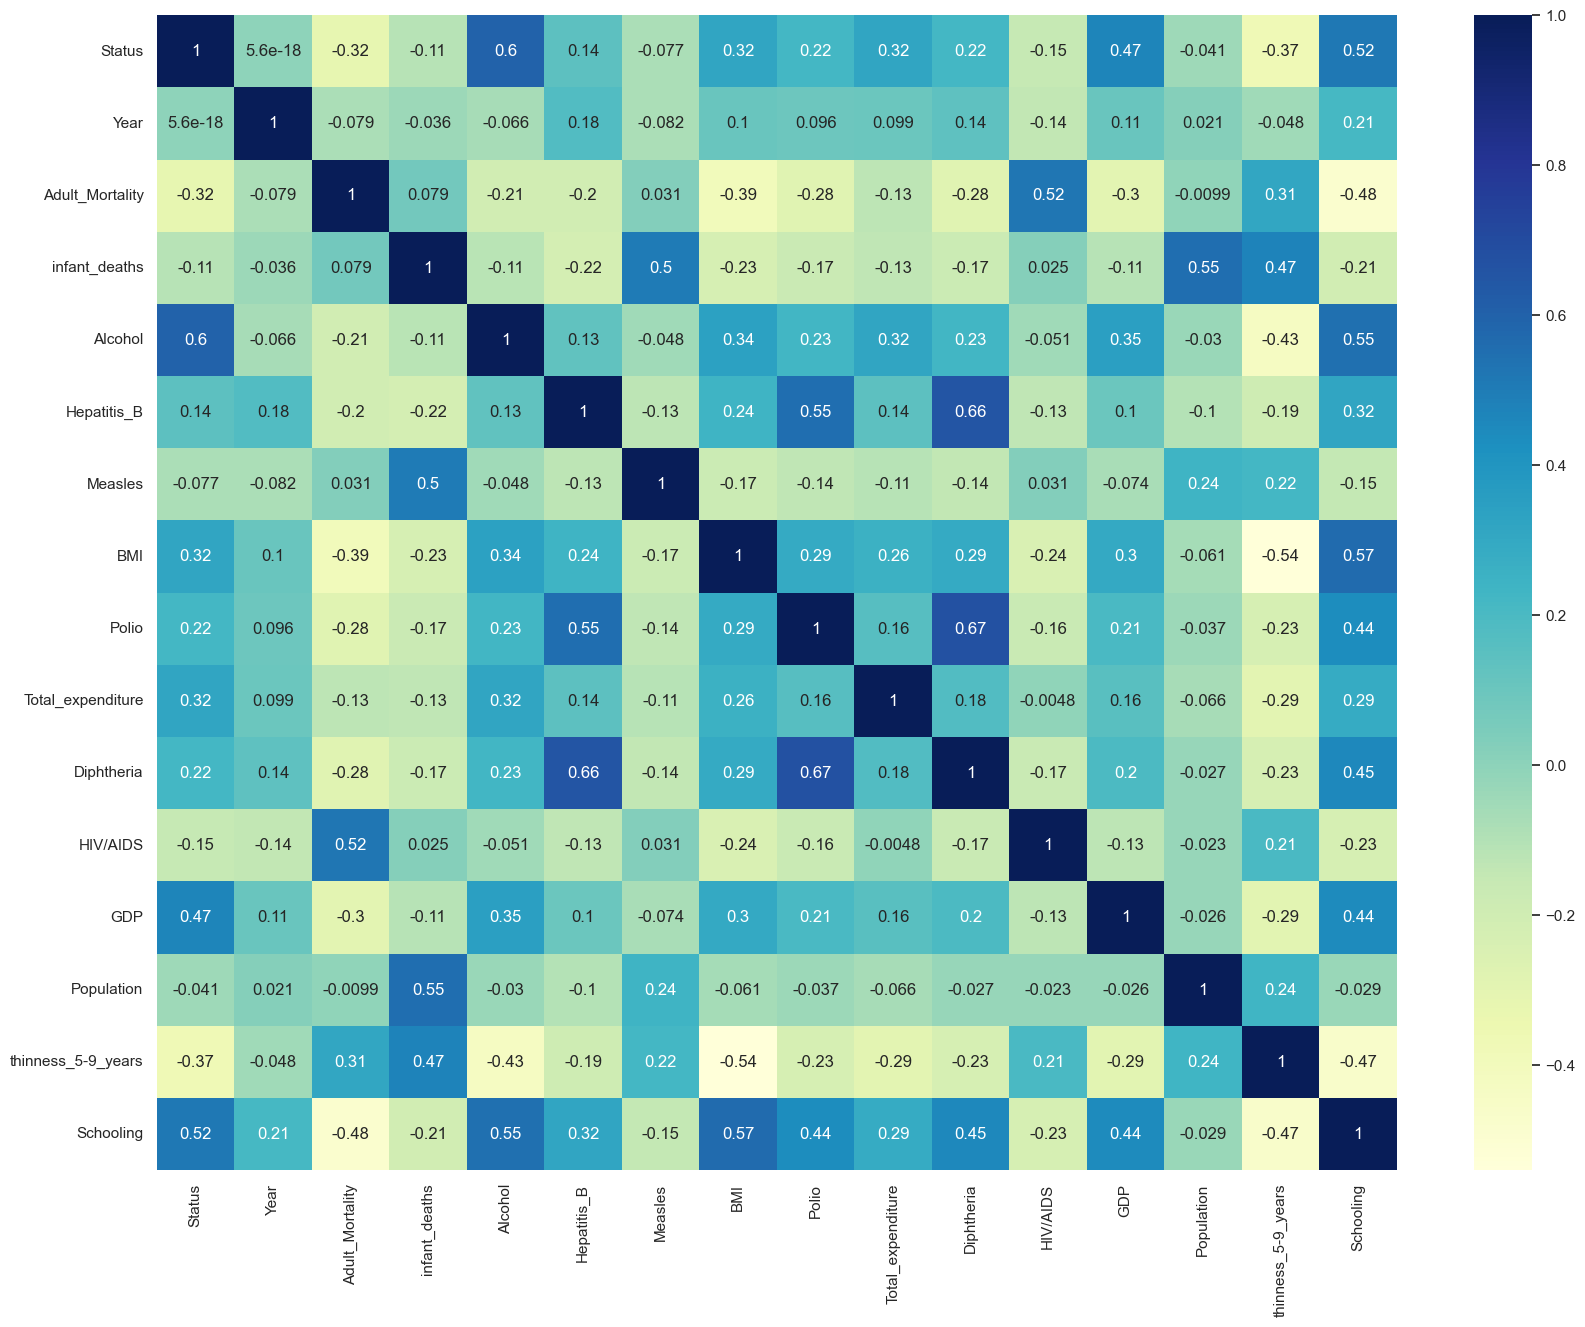

In [52]:
# Ensuring there is no further correlation

plt.figure(figsize = (20,15))
sns.heatmap(x.corr(),  annot = True, cmap = 'YlGnBu')
plt.show()

## Model Building

In [53]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [54]:
# Importing the libraries for model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

In [55]:
# Importing R2, MAE, MSE

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
# creating an empty dataframe to store the values
R2_df = pd.DataFrame(columns = ['Model Name', 'Training_R2', 'Testing_R2'])

# creating a function to perform the model building
def predict(model_name):
    print(f'Model Name: {model_name}')
    model = model_name.fit(x_train,y_train) # fitting the data to model
    train_pred = model.predict(x_train)     # predict train data
    test_pred = model.predict(x_test)       # predict test data
    print()
    print('R2_SCORE')
    print()
    training_r2 = r2_score(y_train,train_pred)
    testing_r2 = r2_score(y_test,test_pred)
    print(f'Training : {training_r2}')
    print(f'Testing  : {testing_r2}')
    print()
    print('Mean_Squared_Error(MSE)')
    print()
    training_MSE = mean_squared_error(y_train,train_pred)
    testing_MSE = mean_squared_error(y_test,test_pred)
    print(f'Training : {training_MSE}')
    print(f'Testing  : {testing_MSE}')
    print()
    print('Mean_Absolute_Error(MAE)')
    print()
    training_MAE = mean_absolute_error(y_train,train_pred)
    testing_MAE = mean_absolute_error(y_test,test_pred)
    print(f'Training : {training_MAE}')
    print(f'Testing  : {testing_MAE}')
    print()
    print('Root_Mean_Squared_Error(RMSE)')
    print()
    training_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    testing_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    print(f'Training : {training_RMSE}')
    print(f'Testing  : {testing_RMSE}')
    
    # storing the R2 values to a dataframe
    r2_scores = pd.DataFrame({'Model Name': [model_name], 'Training_R2': [training_r2], 'Testing_R2': [testing_r2]})
    
    global R2_df # accessing global variable
    
    R2_df = pd.concat([R2_df, r2_scores], ignore_index=True) # concatenating the stored value to  the empty df

In [57]:
predict(LinearRegression())

Model Name: LinearRegression()



R2_SCORE



Training : 0.8144623432702055

Testing  : 0.8183353147963293



Mean_Squared_Error(MSE)



Training : 17.011685738279336

Testing  : 15.71388669325584



Mean_Absolute_Error(MAE)



Training : 3.095772481606921

Testing  : 2.983395911154952



Root_Mean_Squared_Error(RMSE)



Training : 4.124522486092097

Testing  : 3.9640745065217735


In [58]:
predict(RandomForestRegressor())

Model Name: RandomForestRegressor()



R2_SCORE



Training : 0.9942136762445568

Testing  : 0.9629915427843982



Mean_Squared_Error(MSE)



Training : 0.5305398539709654

Testing  : 3.2012094300341296



Mean_Absolute_Error(MAE)



Training : 0.45865755764303906

Testing  : 1.1252559726962466



Root_Mean_Squared_Error(RMSE)



Training : 0.7283816677889178

Testing  : 1.7891923960363036


In [59]:
predict(DecisionTreeRegressor())

Model Name: DecisionTreeRegressor()



R2_SCORE



Training : 1.0

Testing  : 0.9256231914290635



Mean_Squared_Error(MSE)



Training : 0.0

Testing  : 6.433549488054608



Mean_Absolute_Error(MAE)



Training : 0.0

Testing  : 1.5232081911262798



Root_Mean_Squared_Error(RMSE)



Training : 0.0

Testing  : 2.5364442607821305


In [60]:
predict(XGBRegressor())

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,

             colsample_bylevel=None, colsample_bynode=None,

             colsample_bytree=None, device=None, early_stopping_rounds=None,

             enable_categorical=False, eval_metric=None, feature_types=None,

             gamma=None, grow_policy=None, importance_type=None,

             interaction_constraints=None, learning_rate=None, max_bin=None,

             max_cat_threshold=None, max_cat_to_onehot=None,

             max_delta_step=None, max_depth=None, max_leaves=None,

             min_child_weight=None, missing=nan, monotone_constraints=None,

             multi_strategy=None, n_estimators=None, n_jobs=None,

             num_parallel_tree=None, random_state=None, ...)



R2_SCORE



Training : 0.9991079431670301

Testing  : 0.9610086221981923



Mean_Squared_Error(MSE)



Training : 0.08179143129564016

Testing  : 3.372730875594294



Mean_Absolute_Error(MAE)



Training : 0.19697595689156228

T

In [61]:
predict(KNeighborsRegressor())

Model Name: KNeighborsRegressor()



R2_SCORE



Training : 0.942486346325254

Testing  : 0.9030977699514446



Mean_Squared_Error(MSE)



Training : 5.273345687446627

Testing  : 8.381984982935155



Mean_Absolute_Error(MAE)



Training : 1.56935098206661

Testing  : 1.988122866894198



Root_Mean_Squared_Error(RMSE)



Training : 2.2963766432026405

Testing  : 2.8951657954139955


In [62]:
predict(GradientBoostingRegressor())

Model Name: GradientBoostingRegressor()



R2_SCORE



Training : 0.9583297769900498

Testing  : 0.9421111074139502



Mean_Squared_Error(MSE)



Training : 3.8206839031154636

Testing  : 5.007354609815292



Mean_Absolute_Error(MAE)



Training : 1.4139138854053508

Testing  : 1.5940032057774152



Root_Mean_Squared_Error(RMSE)



Training : 1.9546569783763759

Testing  : 2.2377119139458705


In [63]:
predict(AdaBoostRegressor())

Model Name: AdaBoostRegressor()



R2_SCORE



Training : 0.8974948861258712

Testing  : 0.8914508689847016



Mean_Squared_Error(MSE)



Training : 9.398549138371166

Testing  : 9.389434955469913



Mean_Absolute_Error(MAE)



Training : 2.4754777934524266

Testing  : 2.426934794633522



Root_Mean_Squared_Error(RMSE)



Training : 3.0657053247778343

Testing  : 3.0642184901651373


In [64]:
predict(SVR())

Model Name: SVR()



R2_SCORE



Training : 0.8779515650933639

Testing  : 0.8758035113266395



Mean_Squared_Error(MSE)



Training : 11.190448645712149

Testing  : 10.742922040821533



Mean_Absolute_Error(MAE)



Training : 2.2678861116359847

Testing  : 2.235355247789934



Root_Mean_Squared_Error(RMSE)



Training : 3.3452127952810637

Testing  : 3.277639705767175


In [65]:
# Dataframe containing the R2_scores of all models
models = ['LinReg','RForest','DTree','XGBoost','KNN','GradBoost','AdaBoost','SVR']
R2_df.drop('Model Name', axis =1,inplace=True)
R2_df.index = models
R2_df

Training_R2  Testing_R2
LinReg            0.81        0.82
RForest           0.99        0.96
DTree             1.00        0.93
XGBoost           1.00        0.96
KNN               0.94        0.90
GradBoost         0.96        0.94
AdaBoost          0.90        0.89
SVR               0.88        0.88

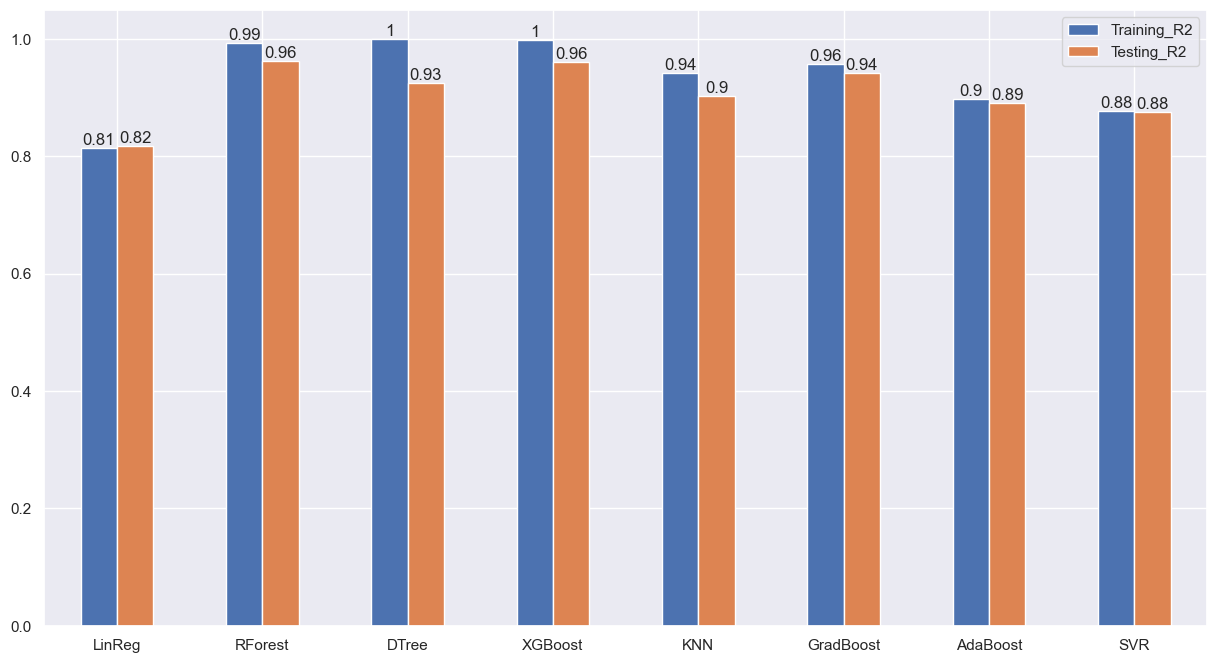

In [66]:
# Visulisation of R2_Scores of train and test data by all models

ax = R2_df.plot(kind = 'bar', figsize = (15,8))
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0],fmt= '%.2g')
ax.bar_label(ax.containers[1],fmt= '%.2g')
plt.show()

## Stacking

In [67]:
# import stacking regressor
from sklearn.ensemble import StackingRegressor

In [68]:
# define the estimators for the regressor

estimators = [('lr',LinearRegression()),
              ('dt',DecisionTreeRegressor()),
              ('xgb',XGBRegressor()),
              ('knn',KNeighborsRegressor()),
              ('gbst',GradientBoostingRegressor()),
              ('adbst',AdaBoostRegressor()),
              ('svm',SVR())
             ]

In [69]:
regressor = StackingRegressor(estimators = estimators,final_estimator=RandomForestRegressor(),cv=10,n_jobs= -1)

In [70]:
regressor.fit(x_train,y_train) # fitting the train data to the stacking regressor

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=Non...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('knn', KNeighborsRegressor()),
                              ('gbst', GradientBoostingRegressor()),
                              ('adbst', AdaBoostRegressor()), ('svm', SVR())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [71]:
# predicting using stacking regressor

stacking_train_pred = regressor.predict(x_train)
stacking_test_pred = regressor.predict(x_test)

print("Stacking_R2_Score")
print(f'Training : {r2_score(y_train, stacking_train_pred)}')
print()
print(f'Testing : {r2_score(y_test, stacking_test_pred)}')
print()
print("Stacking_MAE")
print(f'Training : {mean_absolute_error(y_train, stacking_train_pred)}')
print()
print(f'Testing : {mean_absolute_error(y_test, stacking_test_pred)}')
print()
print("Stacking_MSE")
print(f'Training : {mean_squared_error(y_train, stacking_train_pred)}')
print()
print(f'Testing : {mean_squared_error(y_test, stacking_test_pred)}')
print()
print("Stacking_RMSE")
print(f'Training : {np.sqrt(mean_squared_error(y_train, stacking_train_pred))}')
print()
print(f'Testing : {np.sqrt(mean_squared_error(y_test, stacking_test_pred))}')
print()

Stacking_R2_Score

Training : 0.9914702976579517



Testing : 0.9598818811196483



Stacking_MAE

Training : 0.499536720751495



Testing : 1.2029573378839606



Stacking_MSE

Training : 0.7820763625106751



Testing : 3.4701933054607546



Stacking_RMSE

Training : 0.8843508141629515



Testing : 1.8628454862013528




## Conclusion

Upon Stacking all the models we have got a R2_score of 0.96 for our test data